Problem Statement- Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC. You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

In [411]:
#import all necessary libreries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels



In [412]:
bike=pd.read_csv('train_bikes.csv')
bike_test=pd.read_csv('test_bikes.csv')
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [413]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [414]:
bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [415]:
print('number of records & features:',bike.shape)
print('check for any missing values:',bike.isnull().values.any())

number of records & features: (10886, 12)
check for any missing values: False


In [416]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


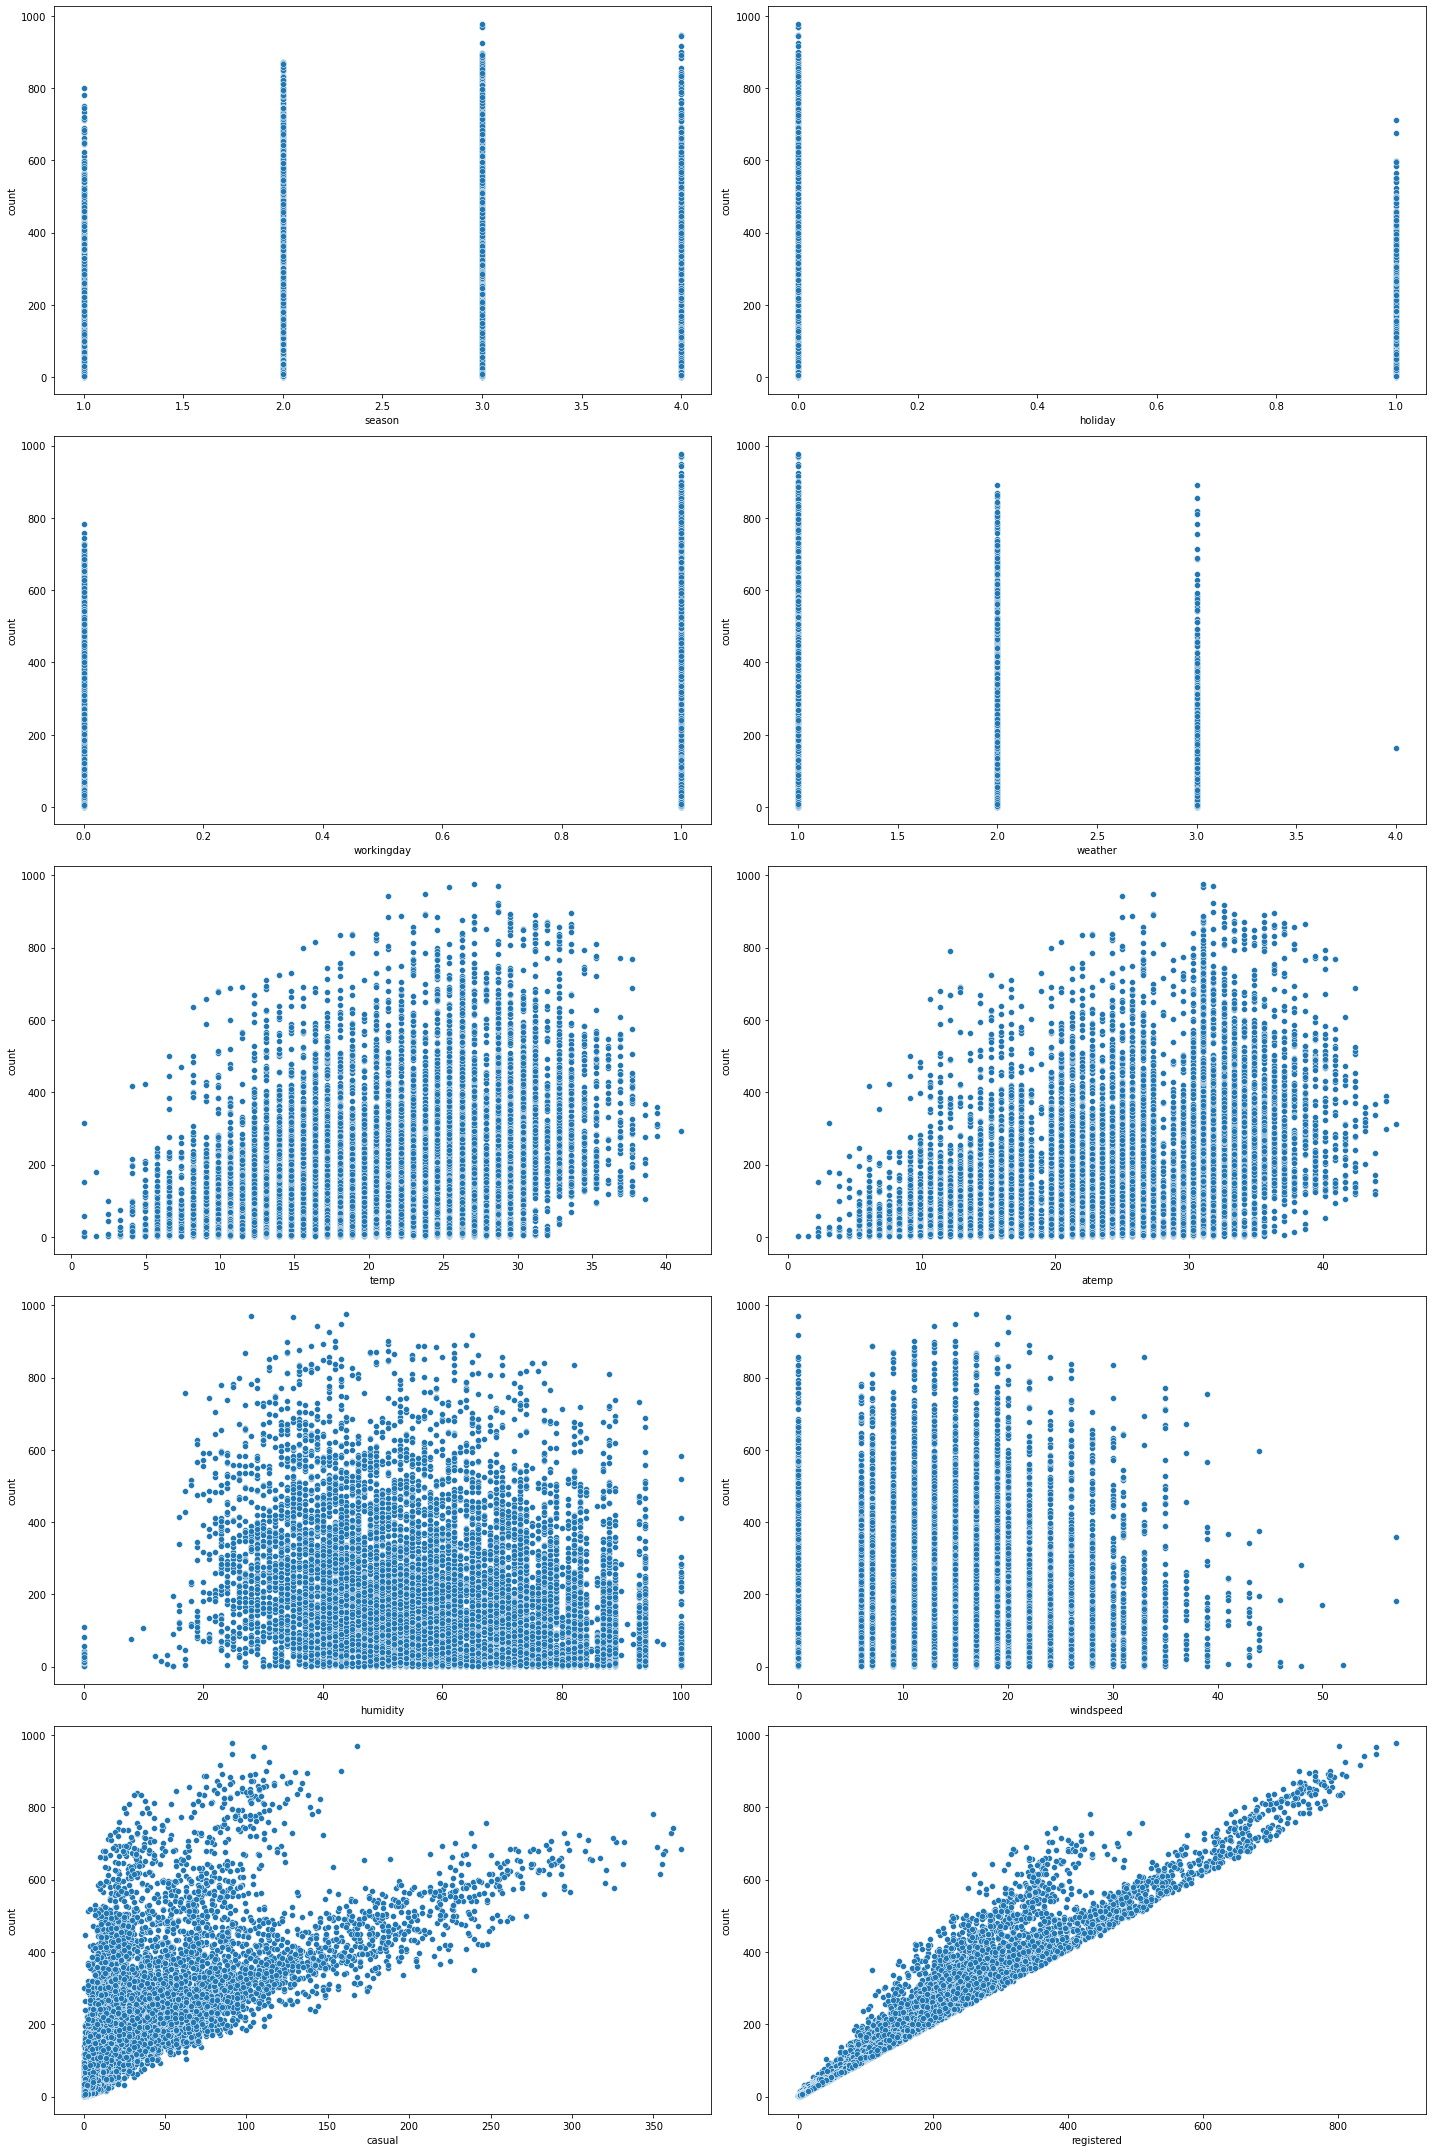

In [417]:
frame=['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered']
plt.figure(figsize=(20,30))
x=1
for i in frame:
    if x<=10:
        
        ax=plt.subplot(5,2,x)
        sns.scatterplot(x=bike[i],y=bike['count'],palette="hls")
        plt.xlabel(i)
        plt.xscale
    x=x+1
plt.tight_layout()

- No.count of bikes for rent increase with increase of registered people
- casual and NO.count of casual is also in linear relation

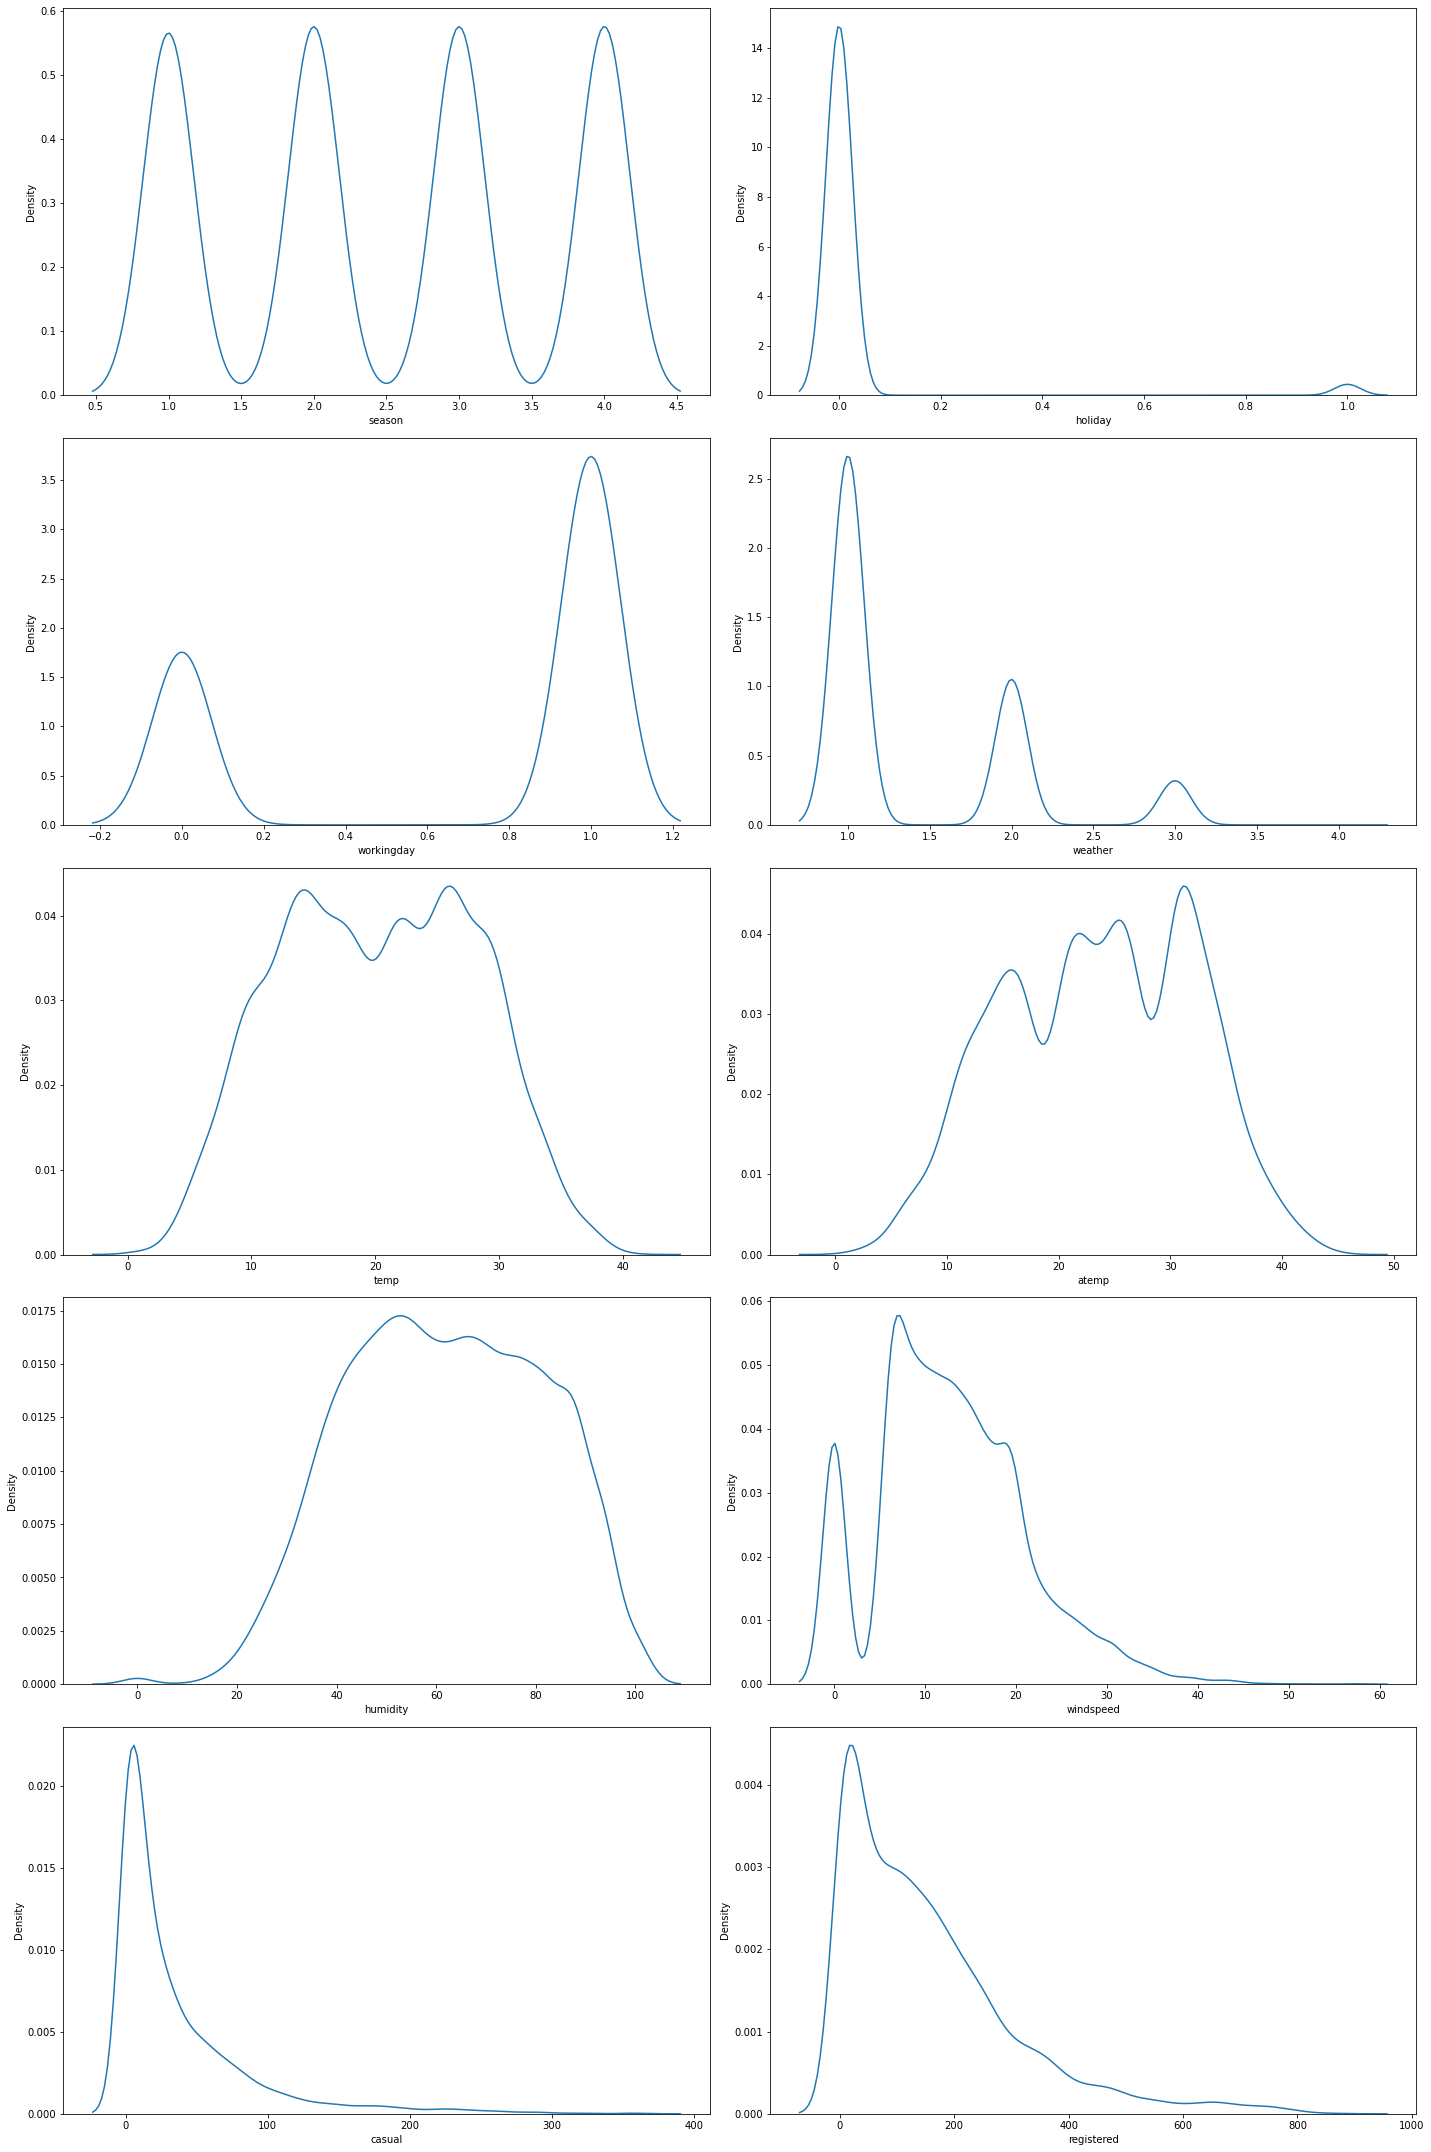

In [418]:
frame=['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered']
plt.figure(figsize=(20,30))
x=1
for i in frame:
    if x<=10:
        ax=plt.subplot(5,2,x)
        sns.kdeplot(bike[i])
        plt.xlabel(i)
        
    x=x+1
plt.tight_layout()

-some feature has skewness toward positve side['registered','casual','windspeed','holiday']

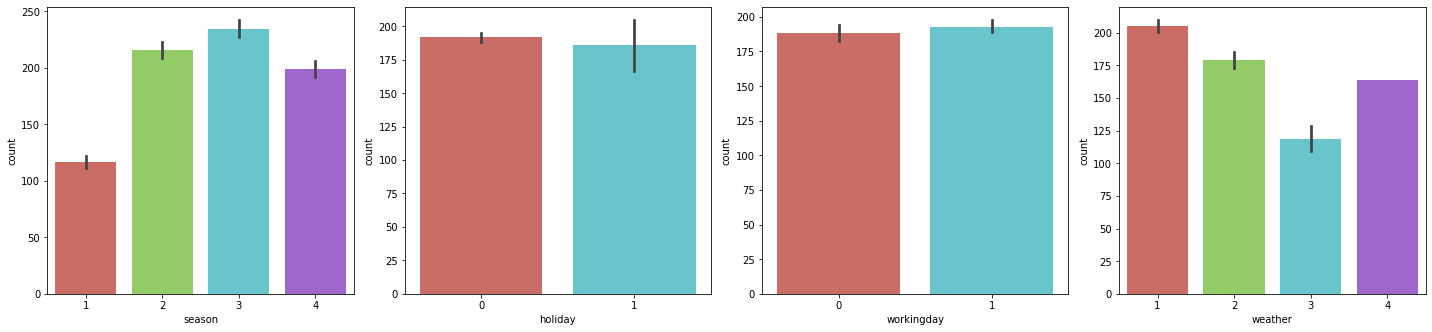

In [419]:
frame=['season','holiday','workingday','weather']
plt.figure(figsize=(20,18))
x=1
for i in frame:
    if x<=4:
        
        ax=plt.subplot(4,4,x)
        sns.barplot(x=bike[i],y=bike['count'],palette="hls")
        plt.xlabel(i)
        plt.xscale
    x=x+1
plt.tight_layout()
    

In [420]:
bike.head()



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [421]:
bike['datetime']=pd.to_datetime(bike['datetime'])
bike_test['datetime']=pd.to_datetime(bike_test['datetime'])

In [422]:
bike['hour']=bike['datetime'].map(lambda x: x.hour)
bike_test['hour']=bike_test['datetime'].map(lambda x: x.hour)

<AxesSubplot:title={'center':'year 2012'}, xlabel='hour'>

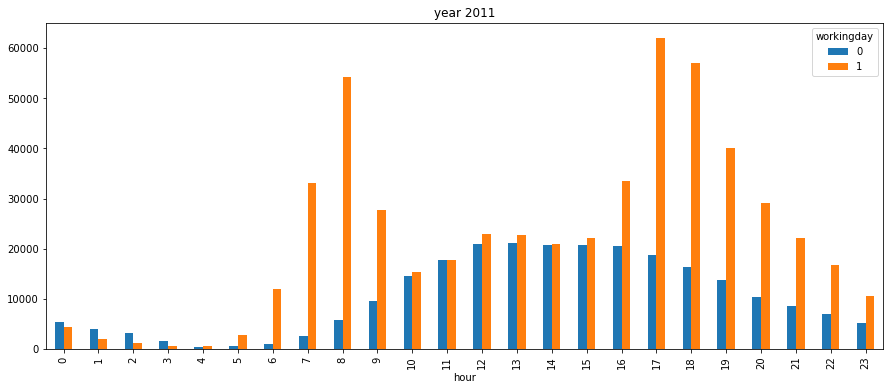

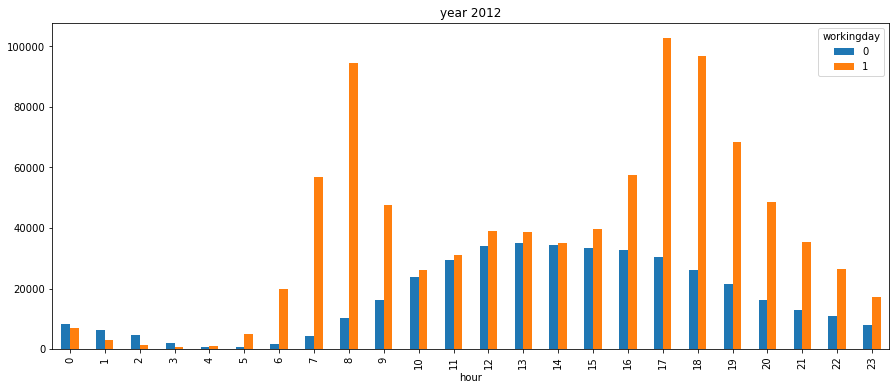

In [423]:
#creating a count plot based on hour for a year
def plot_hours(data,year,agg='sum'):
    
           if year:
                data=data[data.datetime.dt.year==year]
                by_hour=data.groupby(['hour','workingday'])['count'].agg(agg).unstack()
                return by_hour.plot(figsize=(15,6),kind='bar',title='year {0}'.format(year))
        
    
    
plot_hours(bike,2011)  #count plot for 2011
plot_hours(bike,2012) #for 2012

In [424]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


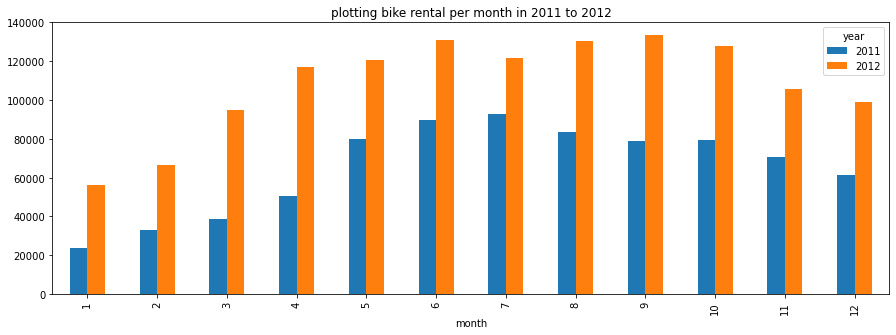

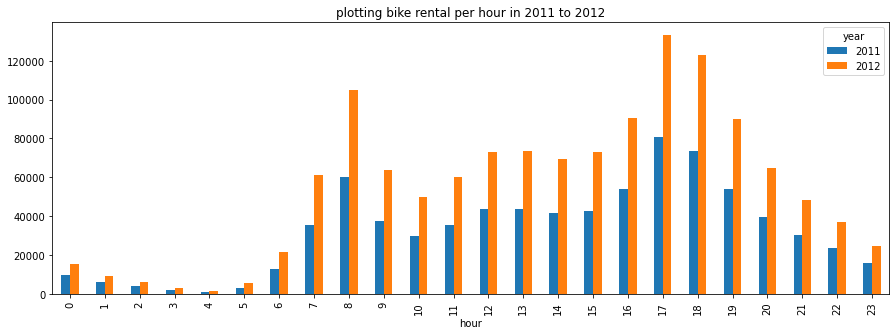

In [425]:
#creating count plot based on year for month
def plot_year(atter1,title):
    data=bike.copy()
    data['year']=data.datetime.dt.year
    data['hour']=data.datetime.dt.hour
    data['month']=data.datetime.dt.month
    by_year=data.groupby([atter1,'year'])['count'].agg('sum').unstack()
    return by_year.plot(kind='bar',figsize=(15,5),title=title)


    
plot_year('month','plotting bike rental per month in 2011 to 2012')
    
plot_year('hour','plotting bike rental per hour in 2011 to 2012')
plt.show()



In [426]:
#plotting of graph count per hours on each year

def cnt_hour(data,msg):
            data=bike.copy()
            data['year']=data.datetime.dt.year
            data['hour']=data.datetime.dt.hour
            
            plt.figure(figsize=(15,5))
            plt.xlabel('hours')
            plt.title(msg+'\n'+' Hours VS count')
            plt.ylim([1,1100])
            
            
            hours={}
            for hour in range(24):
                hours[hour]=data[data.hour==hour]['count'].values
            
            return plt.boxplot([hours[hour] for hour in range(24)])
            
               
           


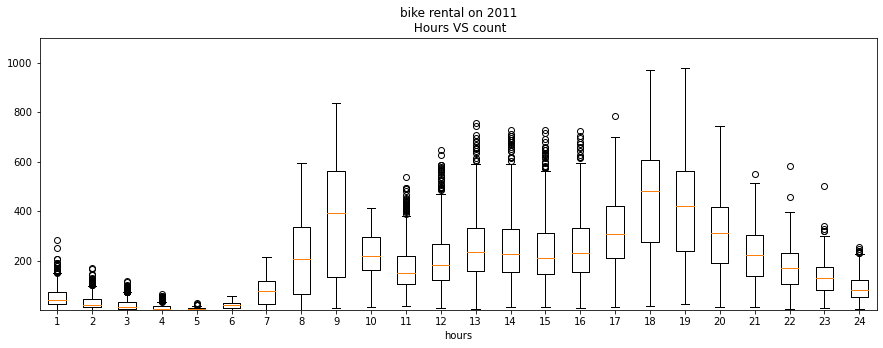

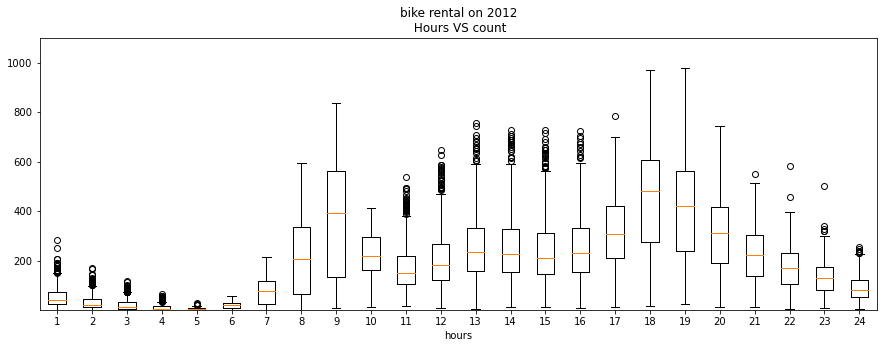

In [427]:
cnt_hour(bike[bike.datetime.dt.year==2011],'bike rental on 2011')
cnt_hour(bike[bike.datetime.dt.year==2012],'bike rental on 2012')
plt.show()

In [428]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


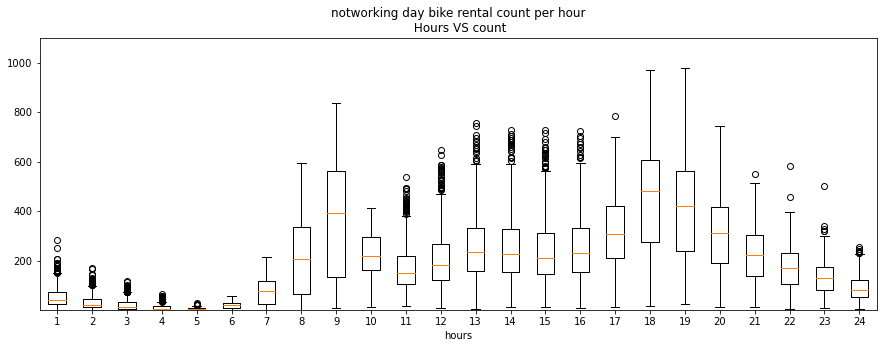

In [429]:

cnt_hour(bike[bike.workingday==0],'notworking day bike rental count per hour')
plt.show()

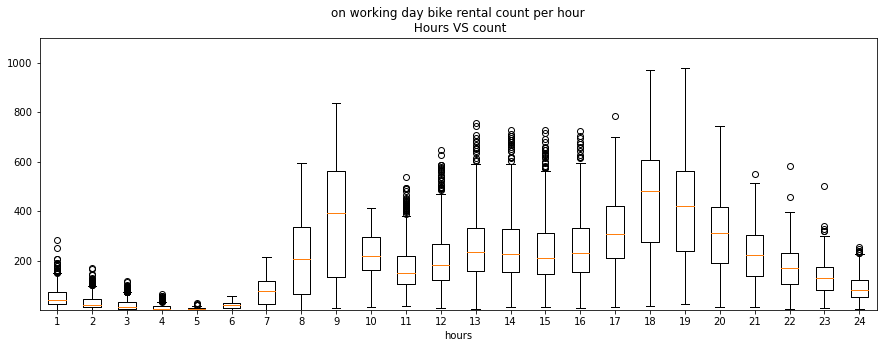

In [430]:
cnt_hour(bike[bike.workingday==1],'on working day bike rental count per hour')
plt.show()

In [431]:
bike.drop('datetime',axis=1,inplace=True)
bike_test.drop('datetime',axis=1,inplace=True)

In [432]:
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [433]:
# how temp effect the count
temp=bike.groupby(['temp'])['count'].mean()
temp=pd.DataFrame(temp,columns=['count'])
temp

,count
temp,
0.82,77.714286
1.64,91.500000
2.46,43.000000
3.28,19.272727
4.10,50.272727
4.92,58.416667
5.74,53.233645
6.56,68.109589
7.38,67.754717


<AxesSubplot:xlabel='temp'>

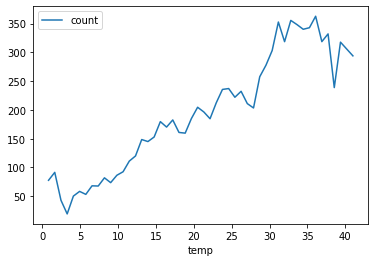

In [434]:
temp.plot()

<AxesSubplot:xlabel='atemp'>

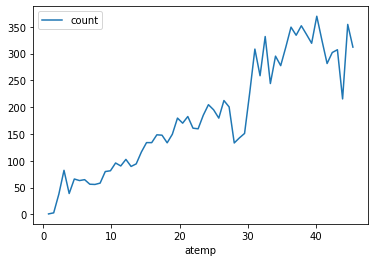

In [435]:
# how atemp effect the count
atemp=bike.groupby(['atemp'])['count'].mean()
atemp=pd.DataFrame(atemp,columns=['count'])
atemp.plot()

<AxesSubplot:xlabel='humidity'>

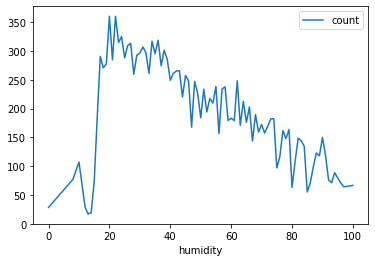

In [436]:
# how humidity effect the count
humid=bike.groupby(['humidity'])['count'].mean()
humid=pd.DataFrame(humid,columns=['count'])
humid.plot()

<AxesSubplot:xlabel='humidity'>

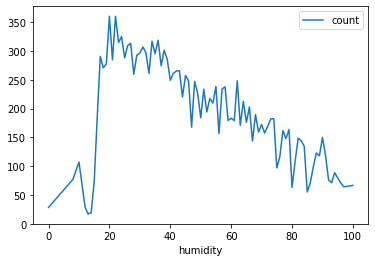

In [437]:
# how humidity effect the count
humid=bike.groupby(['humidity'])['count'].mean()
humid=pd.DataFrame(humid,columns=['count'])
humid.plot()

<AxesSubplot:xlabel='windspeed'>

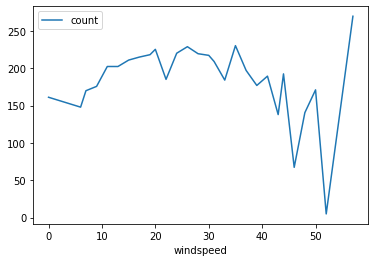

In [438]:
# how windspeed effect the count
windspeed=bike.groupby(['windspeed'])['count'].mean()
windspeed=pd.DataFrame(windspeed,columns=['count'])
windspeed.plot()


<AxesSubplot:xlabel='casual'>

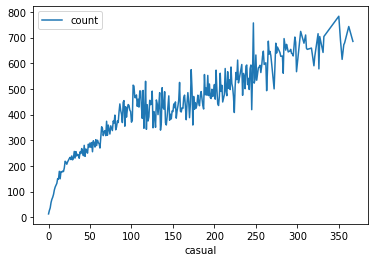

In [439]:

# how casual effect the count
casual=bike.groupby(['casual'])['count'].mean()
casual=pd.DataFrame(casual,columns=['count'])
casual.plot()

<AxesSubplot:xlabel='registered'>

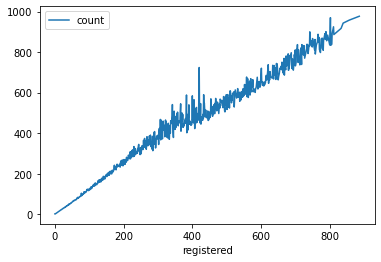

In [440]:
# how registered effect the count
registered=bike.groupby(['registered'])['count'].mean()
registered=pd.DataFrame(registered,columns=['count'])
registered.plot()

In [441]:
y=bike['count'].values
X=bike.drop('count',axis=1)
X.shape

(10886, 11)

In [442]:
# check to multicolinearity
t=bike.corr()['count'][:]
print(t)



from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_scaled=scale.fit_transform(X)

#check the VIF factor 
#if VIF factor in <5 that means there is no colinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['feature']=X.columns
vif


season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
hour          0.400601
Name: count, dtype: float64


,VIF,feature
0,1.167426,season
1,1.074015,holiday
2,1.421690,workingday
3,1.251835,weather
4,35.612761,temp
5,35.684445,atemp
6,1.700012,humidity
7,1.200894,windspeed
8,2.234727,casual
9,1.656566,registered


In [443]:
# vif factor of temp and atemp is >5 ,highly correlated to eachother
#drop one of the feature which is highly correlated

bike.drop('atemp',axis=1,inplace=True)
bike_test.drop('atemp',axis=1,inplace=True)
# holiday  and  workingday is not much correalted to target feature
bike.drop('holiday',axis=1,inplace=True)
bike.drop('workingday',axis=1,inplace=True)
bike_test.drop('holiday',axis=1,inplace=True)
bike_test.drop('workingday',axis=1,inplace=True)

In [444]:
print(bike.shape)



(10886, 9)


In [473]:
y=bike['count']
X=bike.drop('count',axis=1)
X.shape

(10886, 8)

In [474]:
#from sklearn.preprocessing import StandardScaler
#scale=StandardScaler()
#x_scaled=scale.fit_transform(X)


In [475]:
# creating adj-R square
def adj_r2(X,y):
    r2=lm.score(X,y)
    n=bike.shape[0]
    p=bike.shape[1]
    adj_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2



In [476]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [477]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)


LinearRegression()

In [478]:
#saving model in local file system
import pickle
filename='final_model.pickle'
pickle.dump(lm,open(filename,'wb'))

In [480]:
#prediction using saved model
load_model=pickle.load(open(filename,'rb'))
a=load_model.predict(([[1,1,9.84,81,0.0,3,13,0]]))
a

array([16.])

In [481]:
lm.score(x_train,y_train)

1.0

In [482]:
adj_r2(x_train,y_train)

1.0

In [483]:
lm.score(x_test,y_test)

1.0

In [484]:
adj_r2(x_test,y_test)

1.0

In [485]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor()
r.fit(x_train,y_train)


RandomForestRegressor()

In [471]:
bike.head()

,season,weather,temp,humidity,windspeed,casual,registered,count,hour
0,1,1,9.84,81,0.0,3,13,16,0
1,1,1,9.02,80,0.0,8,32,40,1
2,1,1,9.02,80,0.0,5,27,32,2
3,1,1,9.84,75,0.0,3,10,13,3
4,1,1,9.84,75,0.0,0,1,1,4


In [472]:
x_scaled

array([[-1.34986372, -0.66017842, -1.33366069, ..., -0.66099193,
        -0.94385353, -1.66894356],
       [-1.34986372, -0.66017842, -1.43890721, ..., -0.56090822,
        -0.81805246, -1.52434128],
       [-1.34986372, -0.66017842, -1.43890721, ..., -0.62095844,
        -0.851158  , -1.379739  ],
       ...,
       [ 1.33801198, -0.66017842, -0.80742813, ..., -0.64097518,
         0.05593396,  1.36770431],
       [ 1.33801198, -0.66017842, -0.80742813, ..., -0.48084125,
        -0.25525818,  1.51230659],
       [ 1.33801198, -0.66017842, -0.91267464, ..., -0.64097518,
        -0.47375478,  1.65690887]])